In [10]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

# to visualise al the columns in the dataframe
pd.pandas.set_option("display.max_columns", None)
pd.pandas.set_option("display.max_rows", None)

dataset=pd.read_csv("train.csv")

In [3]:
dataset.shape  ##check the size of df

(1460, 81)

In [4]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

Check for missing values and data types

In [5]:
features_nan=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

print(' Total Features with missing values:', len(features_nan))
print(features_nan)

## Get categorical features (dtypes == "O")
catfeatures=[
    feature for feature in dataset.columns
    if dataset[feature].dtype =='object'
    ]

print(' Total Categorical Features:', len(catfeatures))
print(catfeatures)

## Get categorical features (dtypes == "O") with missing values
catfeatures_nan=[
    feature for feature in dataset.columns 
    if dataset[feature].isnull().sum()>0 and 
    dataset[feature].dtypes=='object']

print(' Total Categorical Features with missing values:', len(catfeatures_nan))
print(catfeatures_nan)


## Get numerical features (dtypes != "object")
numfeatures=[
    feature for feature in dataset.columns
    if dataset[feature].dtype !='object'
    ]

print(' Total Numerical Features:', len(numfeatures))
print(numfeatures)

## Get numerical features (dtypes != "object") with missing values
numfeatures_nan=[
    feature for feature in dataset.columns 
    if dataset[feature].isnull().sum()>0
    and dataset[feature].dtypes!='object'
    ]
print(' Total Numerical Features with missing values:', len(numfeatures_nan))
print(numfeatures_nan)

 Total Features with missing values: 19
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
 Total Categorical Features: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
 Total Categorical Features with missing values: 16
['Alley', 'MasVnrType', 'BsmtQual',

In [6]:
##find the missing percentage for each feature
miss=pd.DataFrame({'Type': dataset.dtypes,
                  'Missing': dataset.isna().sum(),
                  'Size': dataset.shape[0],
                  })

miss['Missing_%']= (miss.Missing/miss.Size)*100

miss[miss['Missing']>0].sort_values(by=['Missing_%'], ascending=False)

,Type,Missing,Size,Missing_%
PoolQC,object,1453,1460,99.520548
MiscFeature,object,1406,1460,96.301370
Alley,object,1369,1460,93.767123
Fence,object,1179,1460,80.753425
FireplaceQu,object,690,1460,47.260274
LotFrontage,float64,259,1460,17.739726
GarageType,object,81,1460,5.547945
GarageYrBlt,float64,81,1460,5.547945
GarageFinish,object,81,1460,5.547945
GarageQual,object,81,1460,5.547945


<AxesSubplot:>

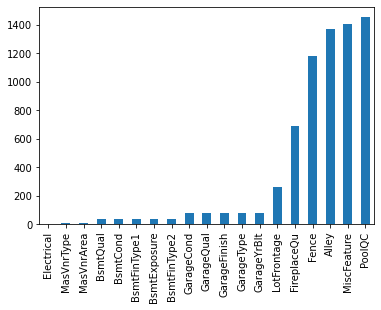

In [7]:
dataset[dataset.columns[dataset.isna().sum() > 0]].isna().sum().sort_values().plot.bar()  ###bar plot of features with missing values

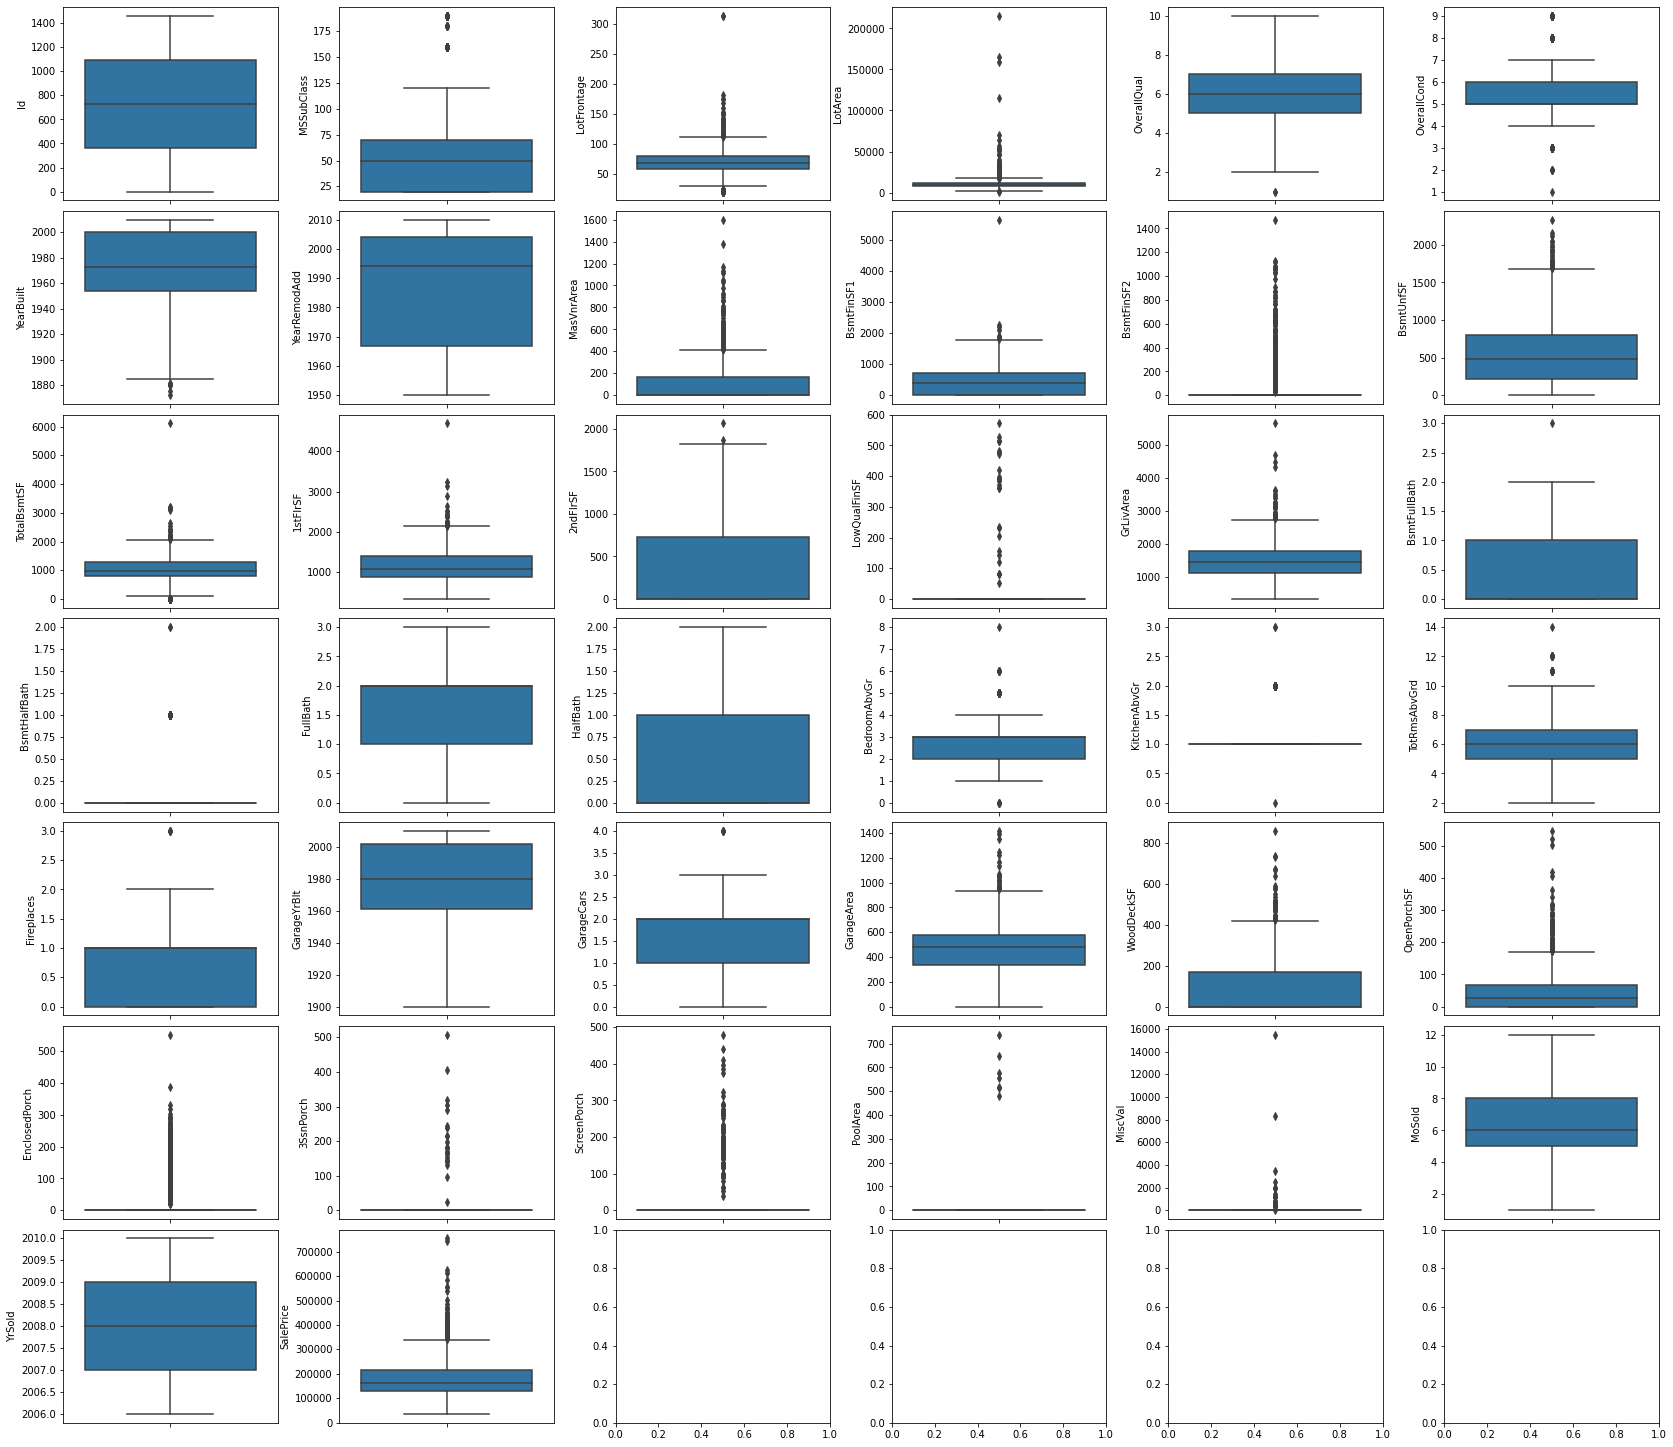

In [36]:
##check for outliers in numeric features
fig, ax = plt.subplots(ncols=6, nrows=7, figsize=(23, 20))
ax = ax.flatten()
index = 0
for feature in dataset[numfeatures]:
  sns.boxplot(y=feature, data=dataset, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.3)
#plt.show()
plt.savefig('boxplot.png')


In [8]:
# check for correlation between features
# Create correlation matrix from train data excluding `SalePrice`
corr_matrix = dataset.drop(["Id"],axis=1).corr().abs()
corr_features=corr_matrix.stack().reset_index()
corr_features.columns = ["f1","f2","corr"]
corr_features= corr_features.sort_values(by= "corr",ascending = False)
corr_features=corr_features.query("f1 != f2").drop_duplicates()
corr_features.head(10)


,f1,f2,corr
951,GarageCars,GarageArea,0.882475
987,GarageArea,GarageCars,0.882475
209,YearBuilt,GarageYrBlt,0.825667
893,GarageYrBlt,YearBuilt,0.825667
829,TotRmsAbvGrd,GrLivArea,0.825489
577,GrLivArea,TotRmsAbvGrd,0.825489
419,TotalBsmtSF,1stFlrSF,0.819530
455,1stFlrSF,TotalBsmtSF,0.819530
147,OverallQual,SalePrice,0.790982
1335,SalePrice,OverallQual,0.790982


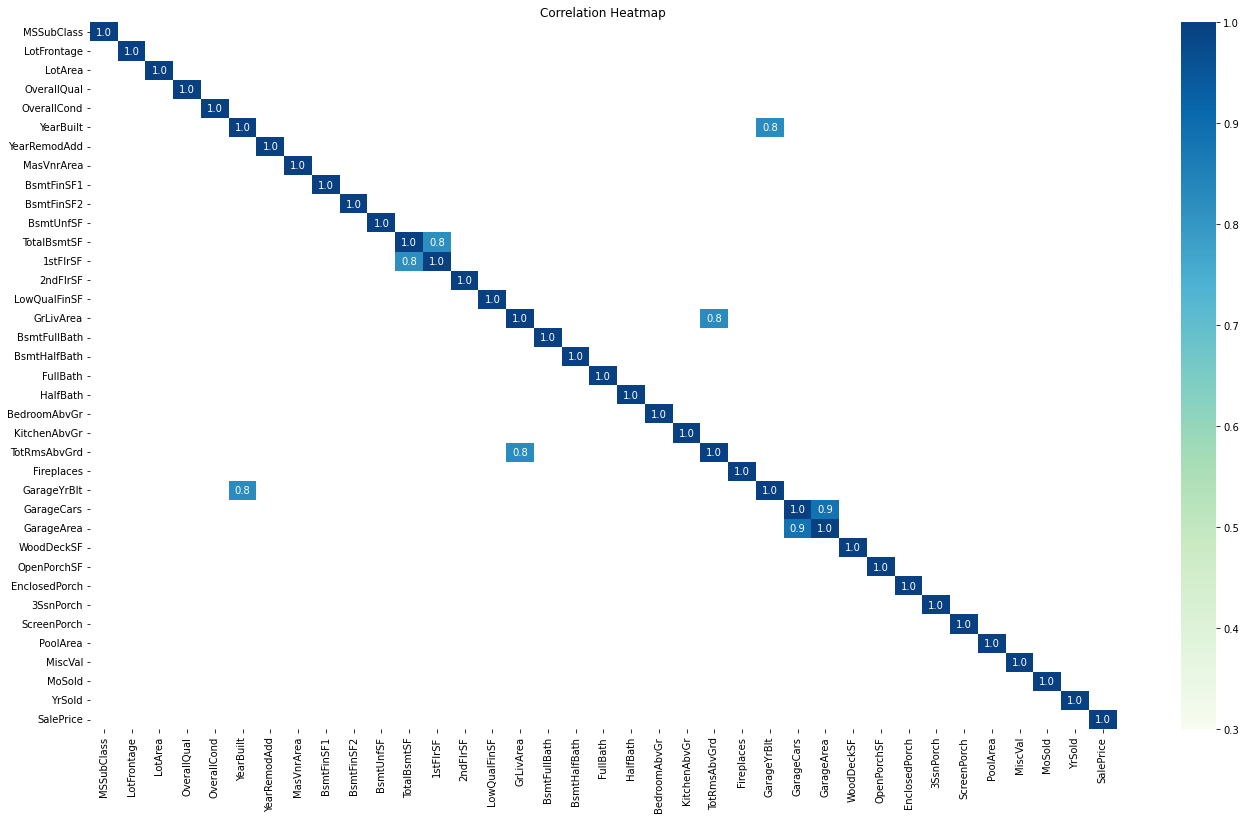

In [45]:
year_features = ['YearBuilt','YearRemodAdd','GarageYrBlt']
# Select correlations greater than 0.8
high_corr_features = corr_matrix[abs(corr_matrix) >= 0.8]
# Plot correlation heatmap
plt.figure(figsize=(23, 13))
sns.heatmap(high_corr_features,annot=True, fmt=".1f", cmap="GnBu", vmin=0.3,vmax=1)
title = plt.title("Correlation Heatmap")



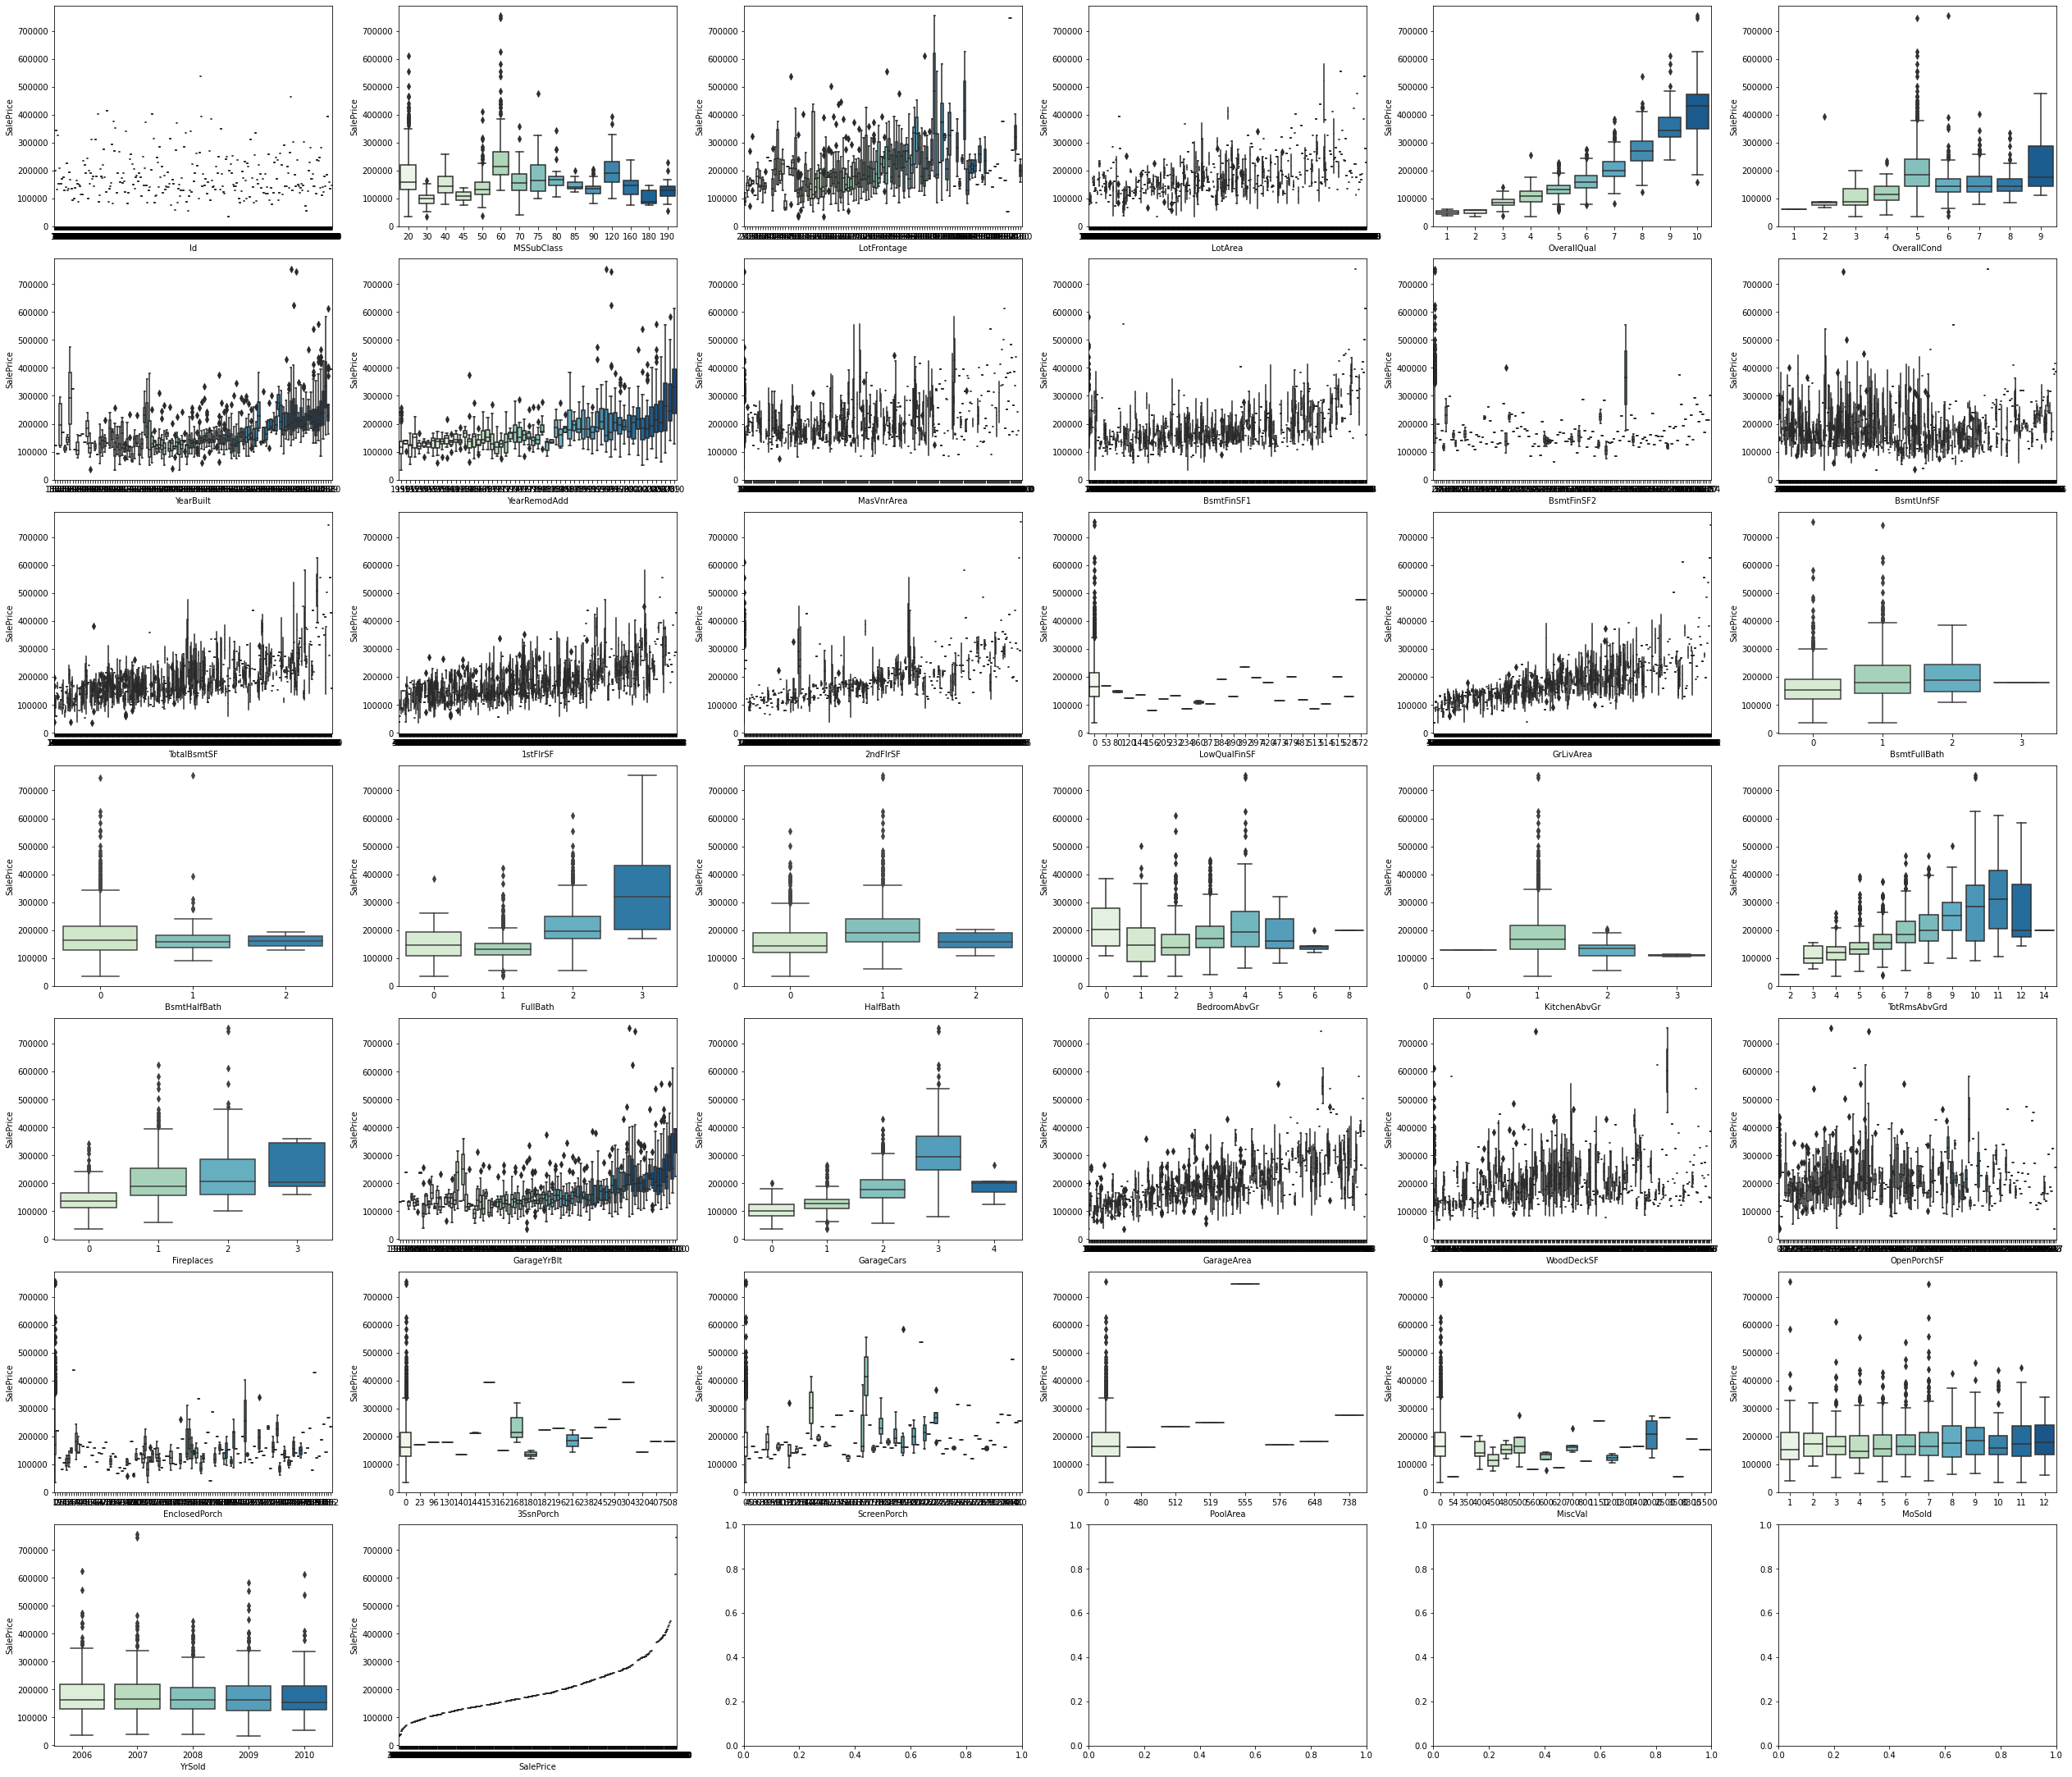

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=7, figsize=(35, 30))
ax = ax.flatten()
index = 0
for feature in dataset[numfeatures]:
  sns.boxplot(x=feature,y='SalePrice', data=dataset, ax=ax[index],palette='GnBu')
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

Check for correlation between sales price and dependent variables

In [52]:

corr_pred_target = dataset[numfeatures].corr().SalePrice.sort_values(ascending=False)
corr_pred_target.head(20)

#drop_features=['TotRmsAbvGrd','GarageArea' ,'1stFlrSF']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

Insights from the dataset:
1) Data has 43 categorical and 38 numeric features
2) Has missing values in both category and numeric features, the data description provides more info on these missing features
3) Exists few highly correlated dependent features,
4) Presence of outliers in numeric features